In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

C:\Users\Tona\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Tona\.cache\kagglehub\datasets\shivamb\netflix-shows\versions\5


In [1]:
# IMPORTO LIBRERIAS NECESARIAS PARA EL ANÁLISIS
import numpy as np #Numerical Phyton para trabajar con arreglos o matrices
import pandas as pd #manejo de datos estructurados 
import seaborn as sns #hacer gráficos estadísticos complejos 
import matplotlib.pyplot as plt #para graficar dando especificaciones del gráfico

# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('C:/Users/Tona/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5/netflix_titles.csv')
df.sample(10).transpose()

,1583,1531,8671,3630,629,921,8552,4489,3915,243
show_id,s1584,s1532,s8672,s3631,s630,s922,s8553,s4490,s3916,s244
type,TV Show,Movie,Movie,Movie,Movie,TV Show,Movie,TV Show,Movie,TV Show
title,100 Days My Prince,The Wedding Shaman,Veerappan,Uriyadi 2,A Way Back Home,StartUp,The Water Diviner,Best.Worst.Weekend.Ever.,Mumbai Matinee,Everything Will Be Fine
director,NaN,Farishad I. Latjuba,Ram Gopal Varma,Vijay Kumar,B. T Thomas,NaN,Russell Crowe,NaN,Anant Balani,NaN
cast,"Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...","Atiqah Hasiholan, Tutie Kirana, Arifin Putra, ...","Sandeep Bharadwaj, Sachiin Joshi, Lisa Ray, Us...","Vijay Kumar, Vismaya, Shankar Thas, Abbas, Sud...","Alexx Ekubo, Ik Ogbonna, Bimbo Manuel, Haillie...","Adam Brody, Edi Gathegi, Otmara Marrero, Marti...","Russell Crowe, Olga Kurylenko, Yılmaz Erdoğan,...","Sam Ashe Arnold, Cole Sand, Brianna Reed, Brit...","Rahul Bose, Vijay Raaz, Anusha Dhandekar, Peri...","Lucía Uribe, Flavio Medina, Isabella Vazquez M..."
country,South Korea,NaN,India,India,NaN,United States,"Australia, United States",United States,India,NaN
date_added,"December 7, 2020","December 17, 2020","October 15, 2017","August 2, 2019","June 28, 2021","May 4, 2021","October 7, 2019","October 19, 2018","April 15, 2019","August 20, 2021"
release_year,2018,2019,2016,2019,2020,2018,2014,2018,2003,2021
rating,TV-14,TV-PG,TV-14,TV-14,TV-14,TV-MA,R,TV-PG,TV-14,TV-MA
duration,1 Season,111 min,117 min,116 min,82 min,3 Seasons,111 min,1 Season,116 min,1 Season


In [3]:
print(f"INFORMACIÓN GENERAL")
print({df.info()})
print("="*50)
print(f"VALORES NULOS")
print(df.isnull().sum())
print("="*50)
print(f"PORCENTAJE DE VALORES NULOS")
print((df.isna().sum()/len(df)) * 100)

INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
{None}
VALORES NULOS
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
l

In [4]:
# MODIFICANDO VALORES NULOS 
df_mod=df.copy()

df_mod['director'] = df_mod['director'].fillna('Director_Unkown')
df_mod['cast'] = df_mod['cast'].fillna('Cast_Unkown')
df_mod['country'] = df_mod['country'].fillna('Country_Unknown')
df_mod['rating']=df_mod['rating'].fillna('rating_unknown')
df_mod['duration']=df_mod['duration'].fillna('duration_unknown')
df_mod['date_added']=df_mod['date_added'].fillna('unknown')
df_mod.dropna(inplace=True)


In [5]:
df_mod.isna().sum()#VERIFICAR VALORES NULOS
df_mod.to_csv('df-clean.csv')#CREO DATASET SIN VALORES NULOS 

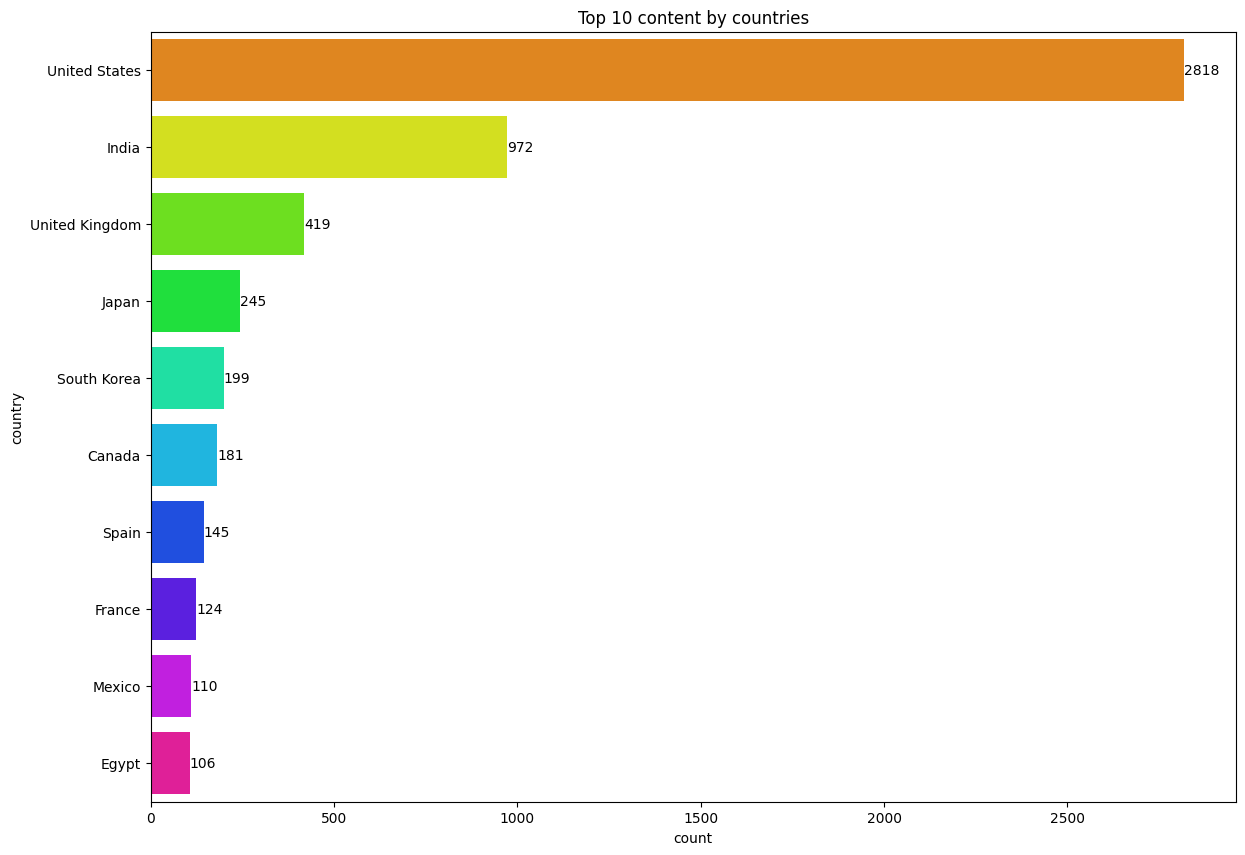

In [6]:
df_country = (
    df_mod[df_mod['country'] != 'Country_Unknown']['country']
    .value_counts()
    .reset_index(name='count')
    .head(10)
)

plt.figure(figsize=(14,10))
plt.title('Top 10 content by countries')
ax=sns.barplot(y='country',x='count',data=df_country,palette='hsv')
for ct in ax.containers:
    ax.bar_label(ct)
plt.show()

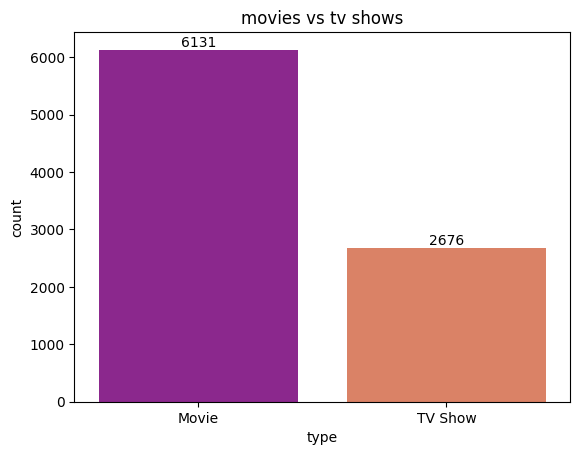

In [7]:
ax=sns.countplot(x='type',data=df_mod,palette='plasma')
for ct in ax.containers:
    ax.bar_label(ct)
plt.title('movies vs tv shows')
plt.show()
    

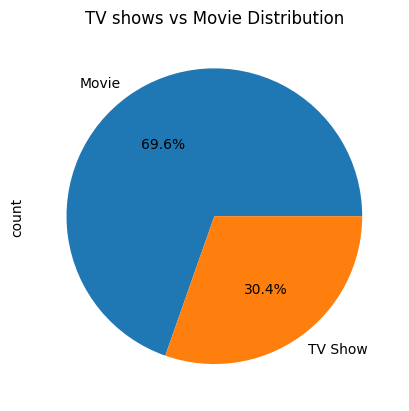

In [8]:
df_mod['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('TV shows vs Movie Distribution')
plt.show()

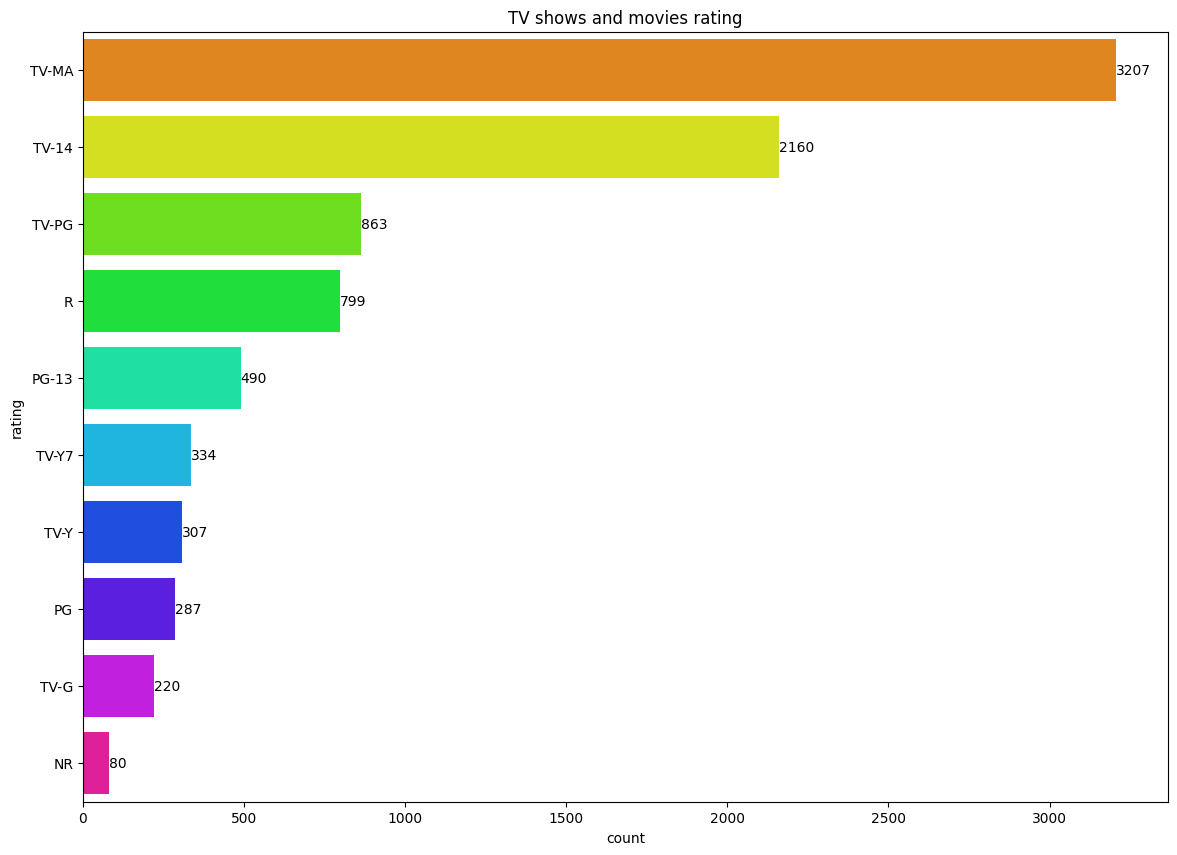

In [9]:
df_rat=df_mod['rating'].value_counts().reset_index().head(10)
#df_rat

plt.figure(figsize=(14,10))
ax=sns.barplot(y='rating',x='count',data=df_rat,palette='hsv')
for ct in ax.containers:
    ax.bar_label(ct)
plt.title('TV shows and movies rating')
plt.show()


In [10]:
numeric_cols=df_mod.select_dtypes(include=['int32','int64','float64']).columns
categorical_cols=df_mod.select_dtypes(include=['object']).columns


In [12]:
df_mod['month_added']=df_mod['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
df_mod['month_added']

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: month_added, Length: 8807, dtype: object

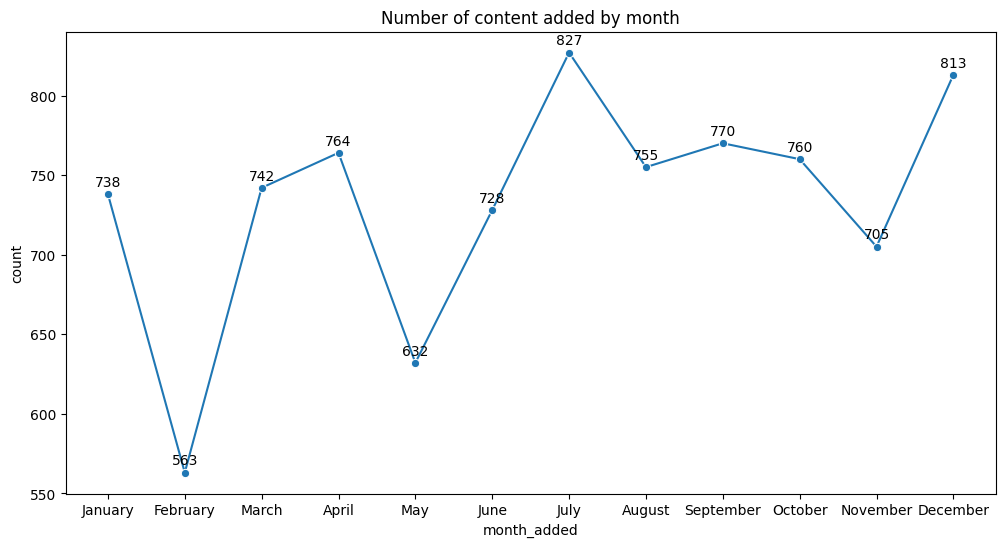

In [13]:
#ne plot for month_added using month order 
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

df_mod['month_added'] = pd.Categorical(df_mod['month_added'], categories=month_order, ordered=True)

# Count how many entries were added in each month
temp = df_mod['month_added'].value_counts().reindex(month_order).reset_index()
temp.columns = ['month_added', 'count']

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_added', y='count', data=temp, marker='o')
for x,y in zip(temp['month_added'],temp['count']): 
    plt.text(x,y+5,str(y),ha='center')
    plt.title('Number of content added by month')
plt.show()

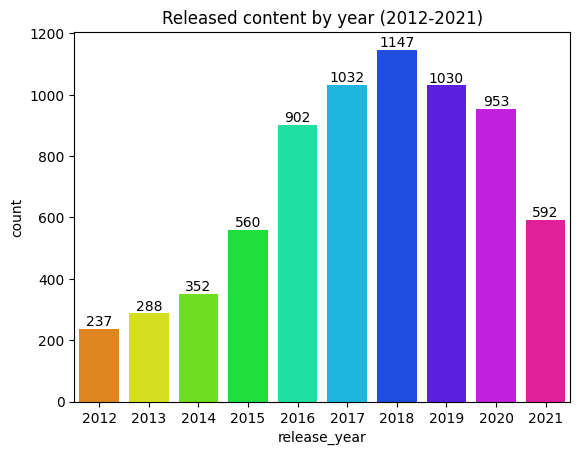

In [14]:
temp=df_mod['release_year'].value_counts().sort_values(ascending=False).reset_index().head(10) 

ax=sns.barplot(x='release_year',y='count',data=temp,palette='hsv')
for ct in ax.containers:
    ax.bar_label(ct)
    plt.title('Released content by year (2012-2021)')

In [15]:
genres=df_mod['listed_in'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False).reset_index()

In [16]:
genres.sample(3).transpose()

,28,2,12
listed_in,LGBTQ Movies,Comedies,Crime TV Shows
count,102,1674,470


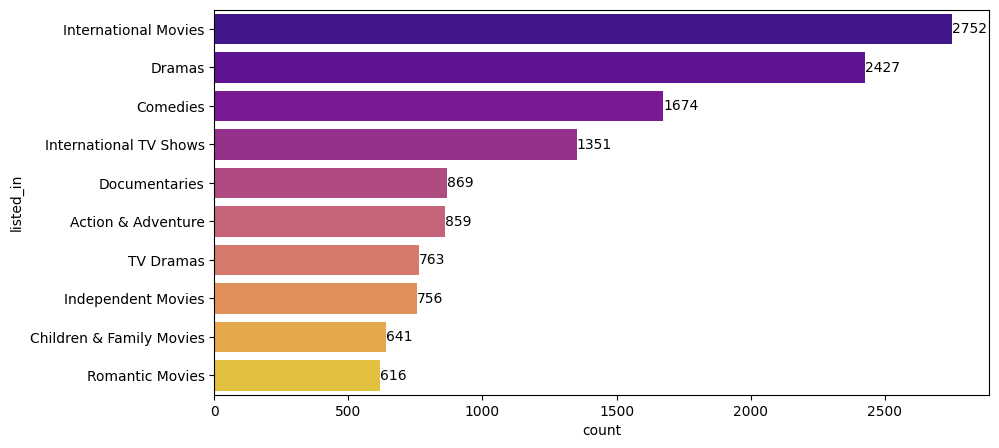

In [17]:
plt.figure(figsize=(10,5))
ax=sns.barplot(y='listed_in',x='count',data=genres.head(10),palette='plasma')
for ct in ax.containers: 
    ax.bar_label(ct)
plt.show()

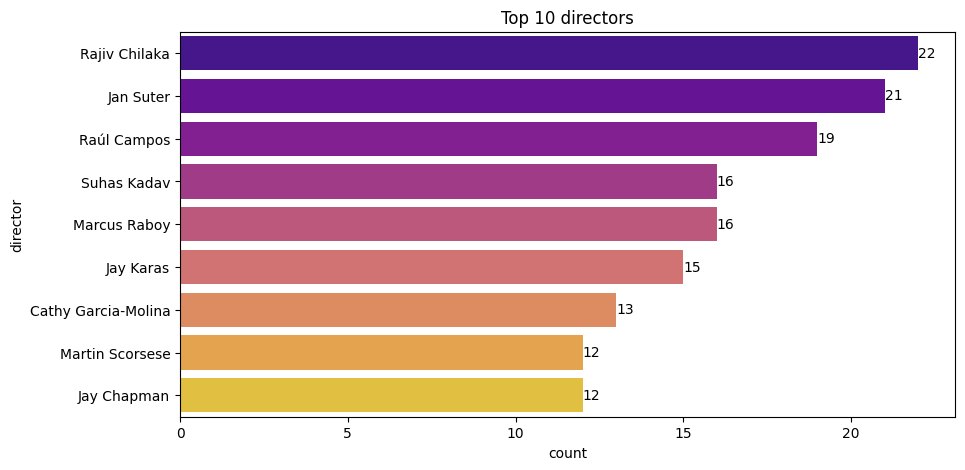

In [18]:
temp=df_mod['director'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False).reset_index().iloc[1:10,:]
plt.figure(figsize=(10,5))
plt.title('Top 10 directors')
ax=sns.barplot(y='director',x='count',data=temp,palette='plasma')
for ct in ax.containers: 
    ax.bar_label(ct)
plt.show()

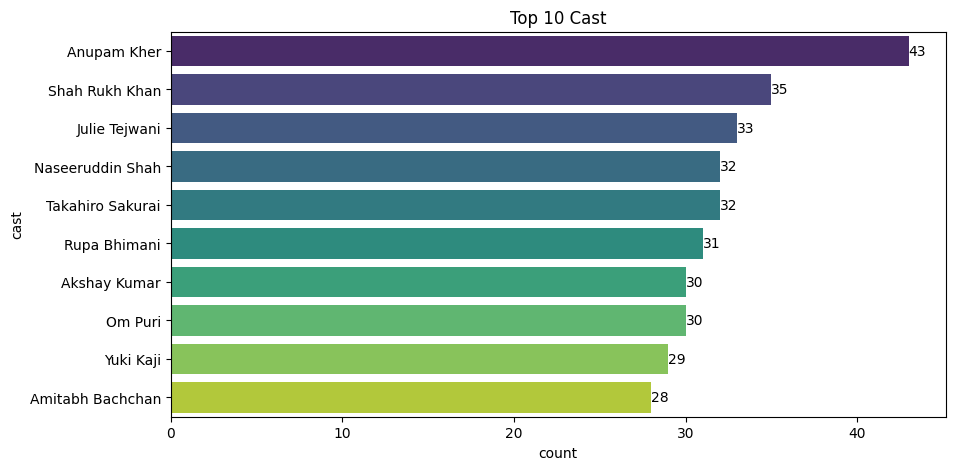

In [19]:
temp=df_mod['cast'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False).reset_index().iloc[1:,:]
plt.figure(figsize=(10,5))
plt.title('Top 10 Cast')
ax=sns.barplot(x='count',y='cast',data=temp.head(10),palette='viridis')
for ct in ax.containers: 
    ax.bar_label(ct)
plt.show()

ANÁLISIS DE CONTENIDO DE ORIGEN MEXICANO 


In [47]:
df_mx=df_mod[df_mod['country']=='Mexico']
df_mx.sample(5).transpose()


,1857,6083,6921,3860,3459
show_id,s1858,s6084,s6922,s3861,s3460
type,Movie,Movie,Movie,TV Show,Movie
title,The Three Deaths of Marisela Escobedo,Acapulco La vida va,Happy Times,Crime Diaries: Night Out,Ready to Mingle
director,Carlos Pérez Osorio,Alfonso Serrano Maturino,Luis Javier M. Henaine,Felipe Cano,Luis Javier Henaine
cast,Cast_Unkown,"Patricio Castillo, Sergio Bustamante, Alejandr...","Luis Arrieta, Cassandra Ciangherotti, Humberto...","Sebastián Osorio, Fabiana Medina, Laura Osma, ...","Cassandra Ciangherotti, Gabriela de la Garza, ..."
country,Mexico,Mexico,Mexico,Mexico,Mexico
date_added,"October 14, 2020","June 3, 2017","February 8, 2017","May 3, 2019","October 2, 2019"
release_year,2020,2016,2014,2019,2019
rating,TV-MA,TV-MA,NR,TV-MA,TV-MA
duration,110 min,89 min,79 min,1 Season,98 min


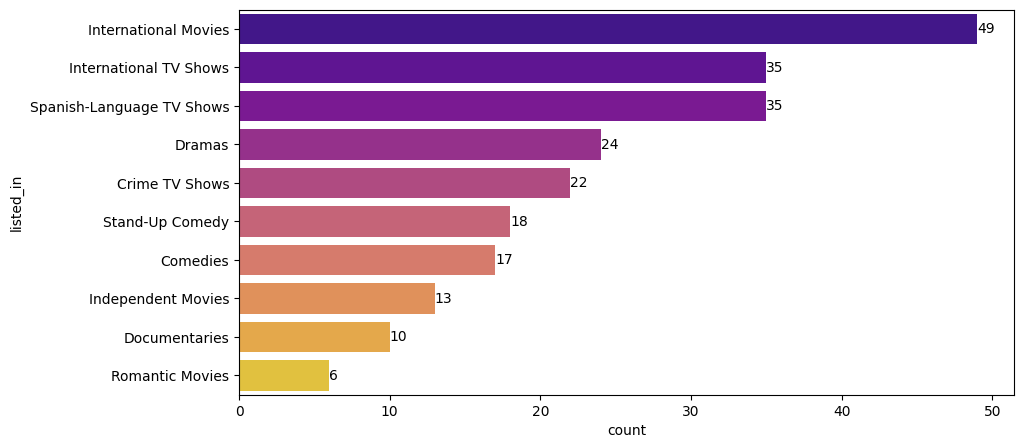

In [22]:
plt.figure(figsize=(10,5))
ax=sns.barplot(y='listed_in',x='count',data=df_mx['listed_in'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False).reset_index().head(10),palette='plasma')
for ct in ax.containers: 
    ax.bar_label(ct)
plt.show()

#genres=df_mod['listed_in'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False).reset_index()

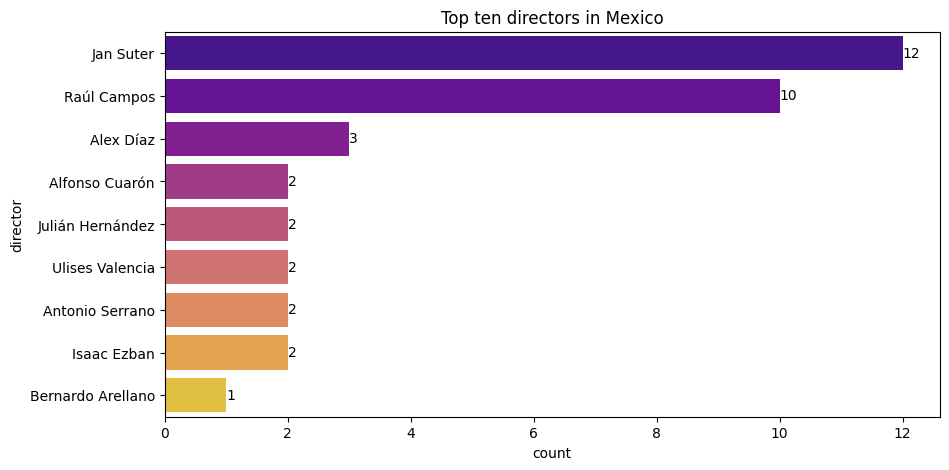

In [23]:
temp=df_mx['director'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False).reset_index().iloc[1:10,:]
plt.figure(figsize=(10,5))
plt.title('Top ten directors in Mexico')
ax=sns.barplot(y='director',x='count',data=temp,palette='plasma')
for ct in ax.containers: 
    ax.bar_label(ct)
plt.show()

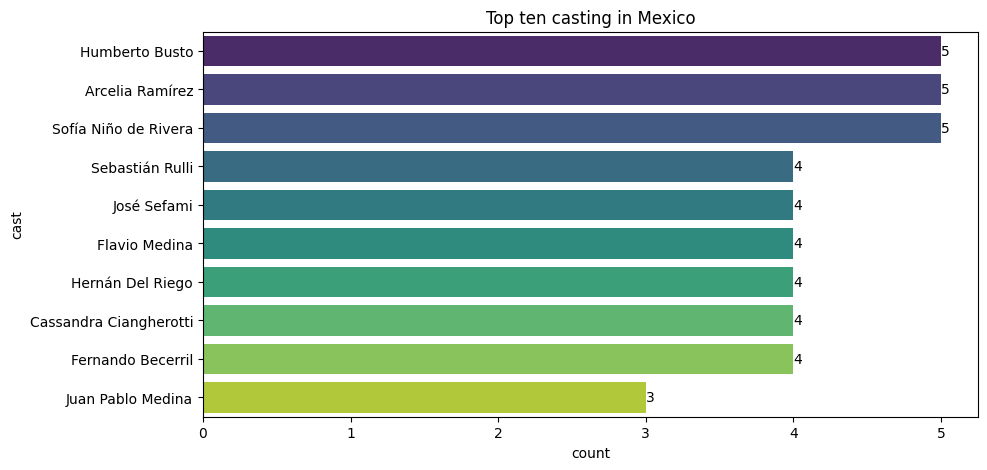

In [24]:
temp=df_mx['cast'].str.split(',').explode().str.strip().value_counts().sort_values(ascending=False).reset_index().iloc[1:,:]
plt.figure(figsize=(10,5))
plt.title('Top ten casting in Mexico')
ax=sns.barplot(x='count',y='cast',data=temp.head(10),palette='viridis')
for ct in ax.containers: 
    ax.bar_label(ct)
plt.show()

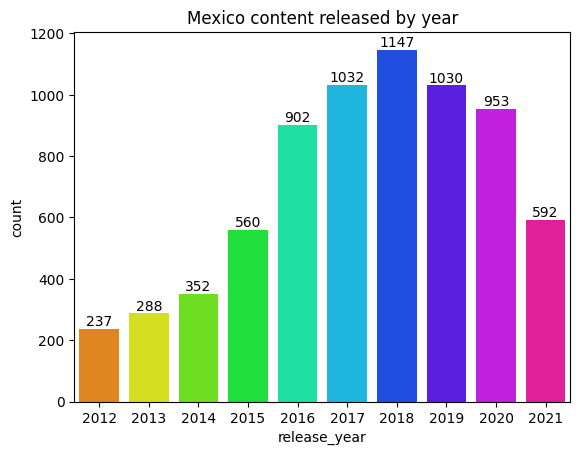

In [31]:
temp=df_mod['release_year'].value_counts().sort_values(ascending=False).reset_index().head(10) 

ax=sns.barplot(x='release_year',y='count',data=temp,palette='hsv')
for ct in ax.containers:
    ax.bar_label(ct)
    plt.title('Mexico content released by year')

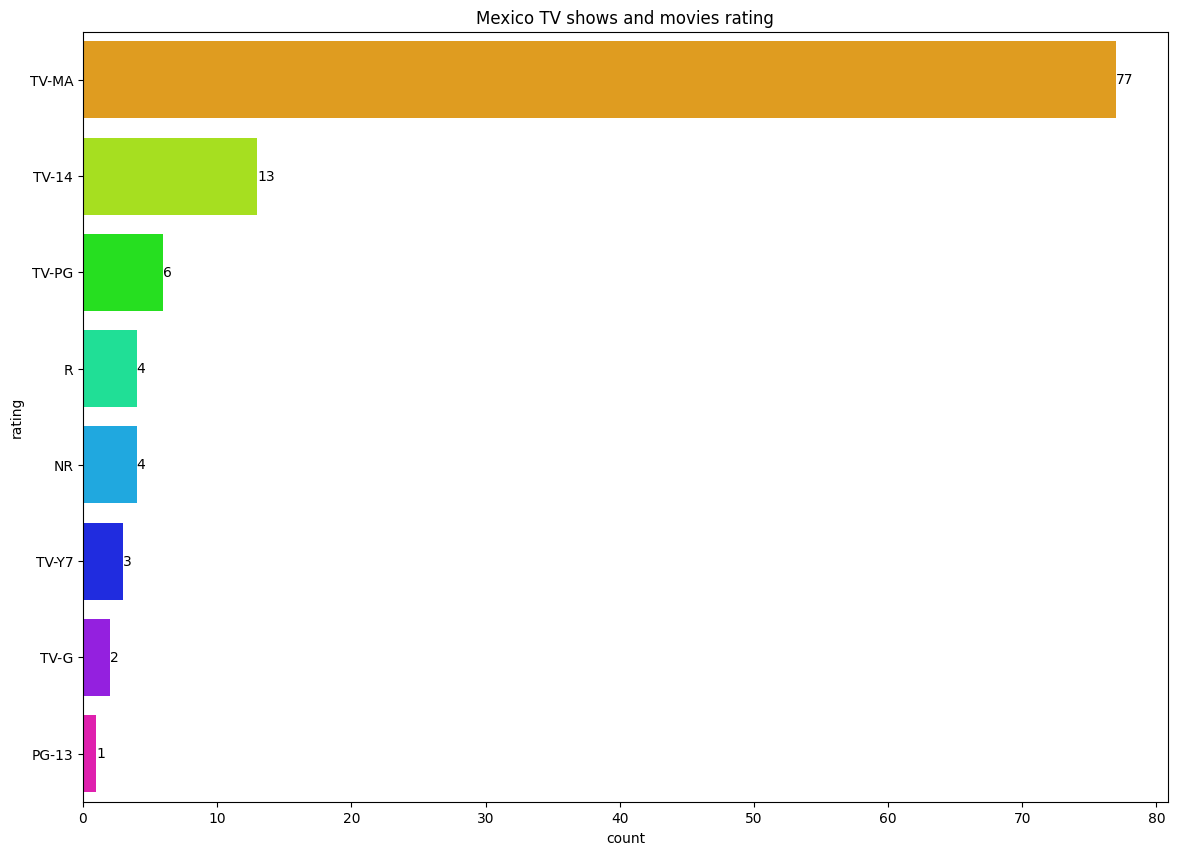

In [30]:
plt.figure(figsize=(14,10))
ax=sns.barplot(y='rating',x='count',data=df_mx['rating'].value_counts().reset_index().head(10),palette='hsv')
for ct in ax.containers:
    ax.bar_label(ct)
plt.title('Mexico TV shows and movies rating')
plt.show()

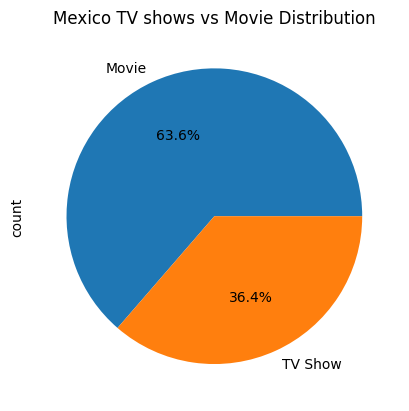

In [29]:
df_mx['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Mexico TV shows vs Movie Distribution')
plt.show()

In [46]:
df_mx

,type,count
0,Movie,1
1,TV Show,1


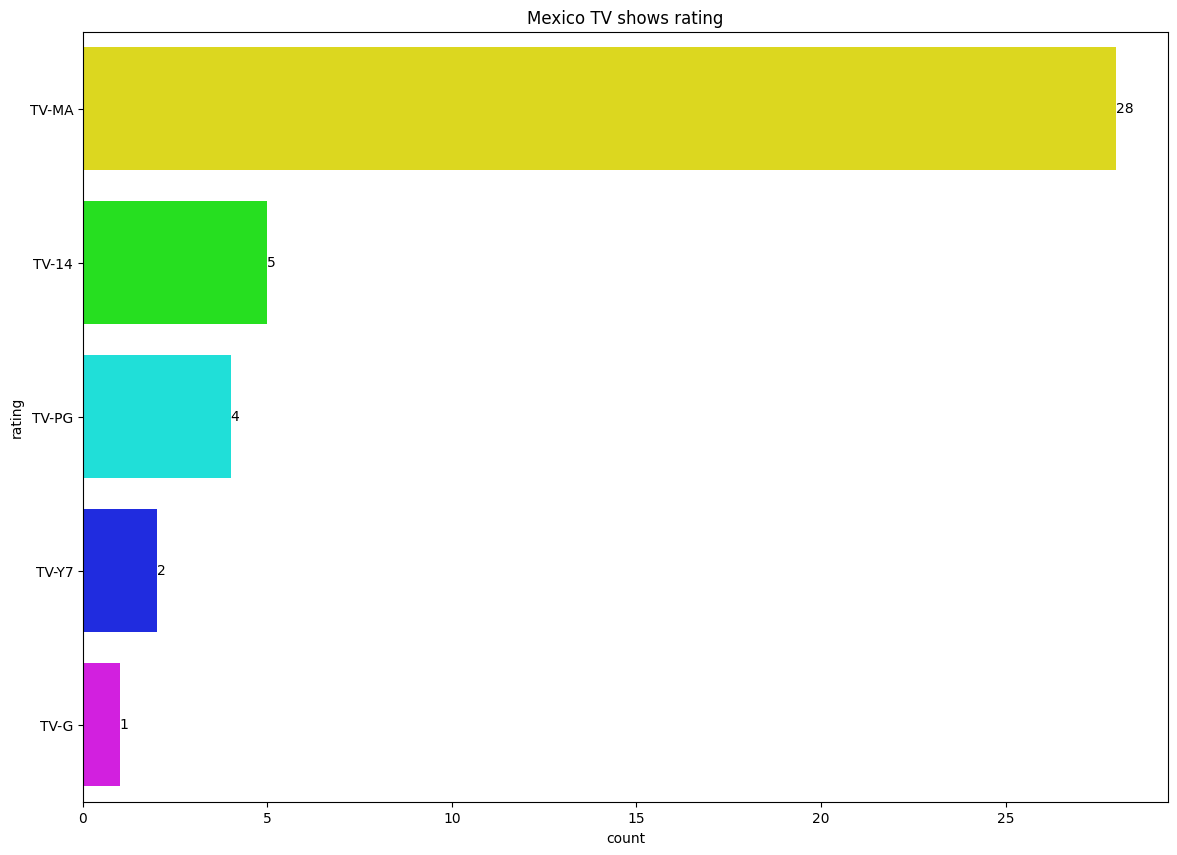

In [52]:
df_tvmx=df_mx[df_mx['type']=='TV Show']
#df_tvmx.sample(5).transpose()
temp=df_tvmx['rating'].value_counts().reset_index().head(10)
plt.figure(figsize=(14,10))
ax=sns.barplot(y='rating',x='count',data=temp,palette='hsv')
for ct in ax.containers:
    ax.bar_label(ct)
plt.title('Mexico TV shows rating')
plt.show()

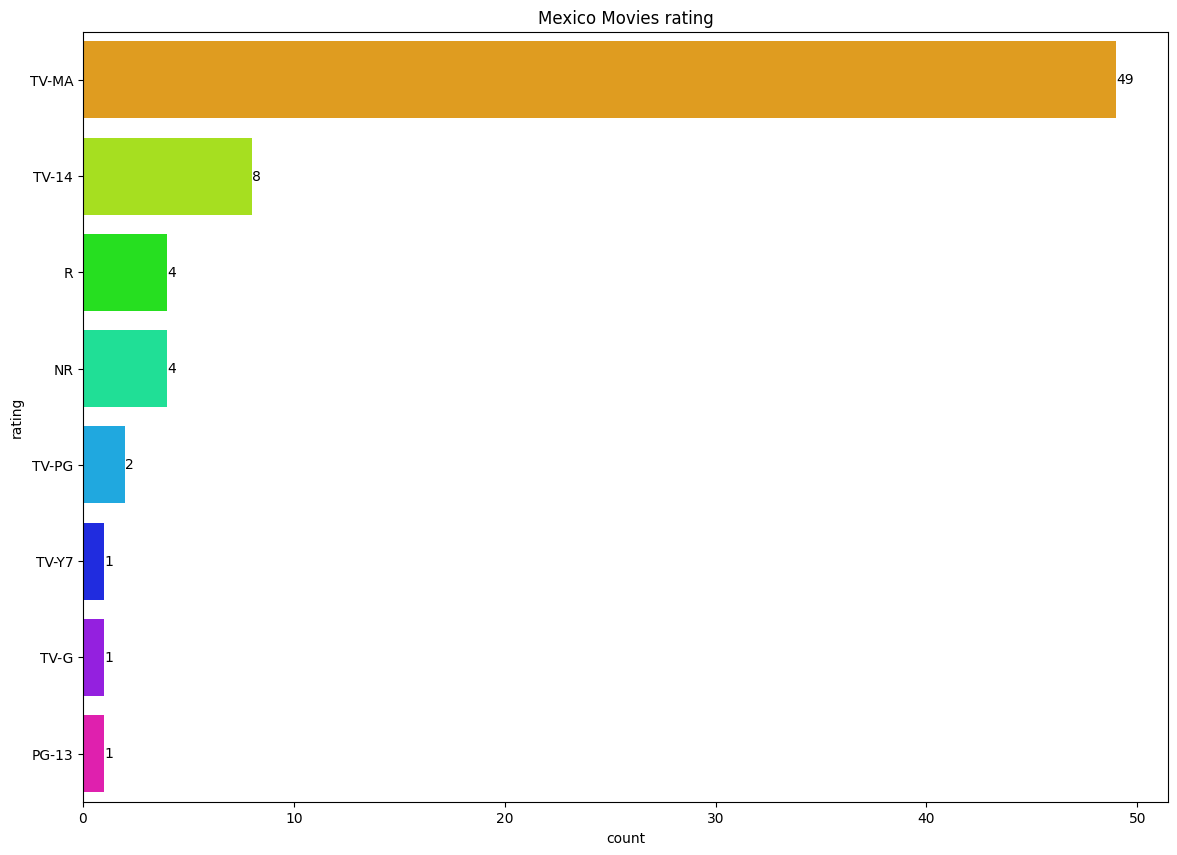

In [53]:
df_mvmx=df_mx[df_mx['type']=='Movie']
#df_mvmx.sample(5).transpose()
temp=df_mvmx['rating'].value_counts().reset_index().head(10)
plt.figure(figsize=(14,10))
ax=sns.barplot(y='rating',x='count',data=temp,palette='hsv')
for ct in ax.containers:
    ax.bar_label(ct)
plt.title('Mexico Movies rating')
plt.show()

In [55]:
df_mvmx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 282 to 8768
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       70 non-null     object  
 1   type          70 non-null     object  
 2   title         70 non-null     object  
 3   director      70 non-null     object  
 4   cast          70 non-null     object  
 5   country       70 non-null     object  
 6   date_added    70 non-null     object  
 7   release_year  70 non-null     int64   
 8   rating        70 non-null     object  
 9   duration      70 non-null     object  
 10  listed_in     70 non-null     object  
 11  description   70 non-null     object  
 12  month_added   70 non-null     category
dtypes: category(1), int64(1), object(11)
memory usage: 7.6+ KB
